In [ ]:
import pandas as pd 

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadgatotsupiadin","key":"616e45e76c19d70693738d2d8d4fd541"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d hanifalirsyad/development-talent-upwork

  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 149MB/s]


In [ ]:
!unzip '/content/development-talent-upwork.zip'

Archive:  /content/development-talent-upwork.zip
  inflating: development_data_upwork.csv  


In [ ]:
upwork = pd.read_csv('/content/development_data_upwork.csv')
upwork.head(3)

,Unnamed: 0,joblink-href,jobtitle,talent_name,talent_rating,talent_desc,price_starter,price_standard,price_advanced,category,subcat,subdetailcat
0,0,https://www.upwork.com/services/product/develo...,You will get a professional domain setup with ...,Muhammad L.,NaN,If you are facing problems with your emails an...,$45,$90,$130,IT Support & Security,Support & IT,NaN
1,1,https://www.upwork.com/services/product/a-gsui...,You will get an efficient email migration to/f...,Varqa K.,4.8,I am able to deliver a migration to and from E...,"$2,000","$2,750","$3,500",IT Support & Security,Support & IT,NaN
2,2,https://www.upwork.com/services/product/develo...,You will get a full Google Workspace/Office 36...,NaN,5.0,I will migrate your data from one email server...,$600,"$1,200","$3,000",IT Support & Security,Support & IT,NaN


Drop collumns

In [ ]:
columns = ['Unnamed: 0', 'subdetailcat']
upwork.drop(columns, inplace=True, axis=1)

Renaming Collumns

In [ ]:
upwork.rename(columns={'joblink-href': 'joblink', 'jobtitle': 'title', 'talent_name': 'name', 'talent_rating': 'rating', 'talent_desc': 'description'}, inplace=True)

Making position collumns

In [ ]:
upwork = upwork.iloc[:, [1,2,3,5,6,7,8,9,0]]

Dropping $ in price collumns

In [ ]:
upwork['price_starter'] = upwork['price_starter'].str.replace('$', '')
upwork['price_standard'] = upwork['price_standard'].str.replace('$', '')
upwork['price_advanced'] = upwork['price_advanced'].str.replace('$', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Cleaning Null data

In [ ]:
upwork.isnull().sum()

title               0
name              816
rating            544
price_starter     937
price_standard    937
price_advanced    937
category            0
subcat            999
joblink             0
dtype: int64

In [ ]:
upwork.shape

(3797, 9)

In [ ]:
upwork_clean = upwork.dropna()
print(upwork_clean)

                                                  title           name  \
1     You will get an efficient email migration to/f...       Varqa K.   
5      You will get ASP.NET Core (C#) Part-time Support       LAKIR P.   
6     You will get end-to-end Remote Infrastructure ...   Indramani G.   
8     You will get dockerize your app and fix docker...    Muhammad U.   
10    You will get Patch Configuration with Monitori...  Vishaldeep S.   
...                                                 ...            ...   
2792  You will get python web scraping and automatio...      Hammad R.   
2793  You will get Web Scraping, Data Extraction, Da...      Alpesh K.   
2794           You will get your app or website tested!       Mário R.   
2796  You will get a Statistical Review of a Grant o...     Michael B.   
2797  You will get a well converted and a formatted ...     Sampath K.   

      rating price_starter price_standard price_advanced  \
1        4.8         2,000          2,750          

In [ ]:
upwork_clean.isnull().sum()

title             0
name              0
rating            0
price_starter     0
price_standard    0
price_advanced    0
category          0
subcat            0
joblink           0
dtype: int64

In [ ]:
upwork_clean.shape

(1757, 9)

In [ ]:
upwork_clean.groupby('subcat').count()

In [ ]:
upwork_clean.groupby('category').count()

In [ ]:
upwork_clean.groupby('rating').count()

### Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

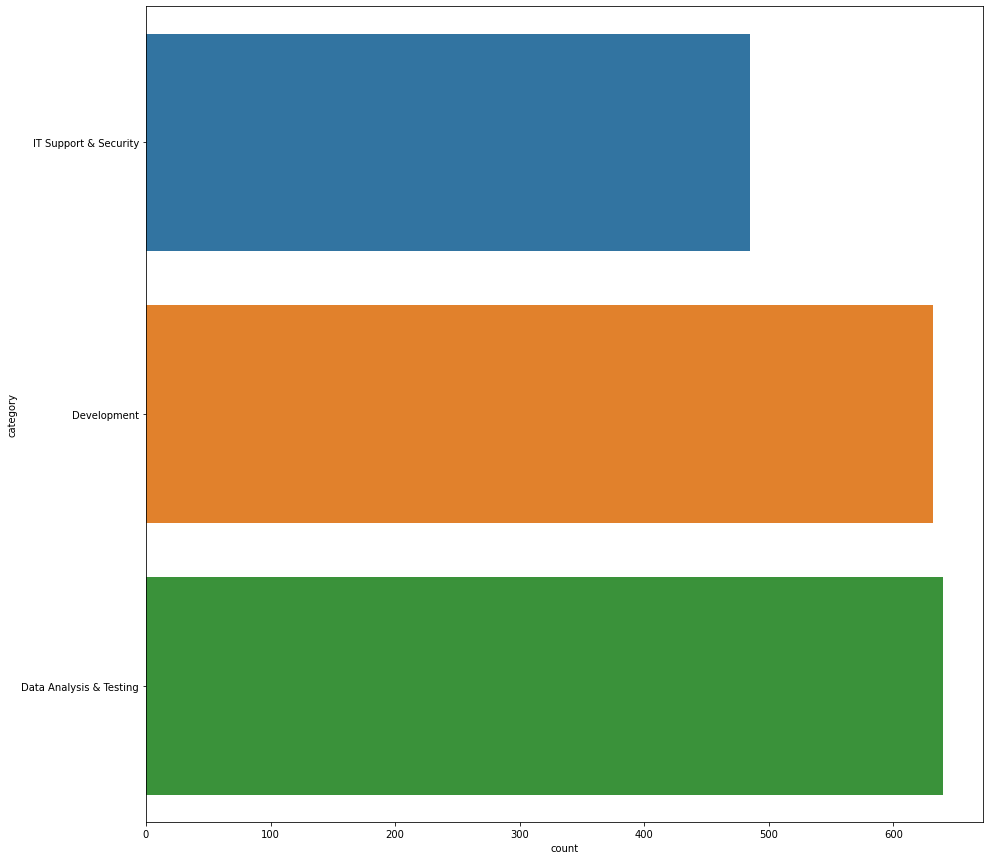

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y=upwork_clean['category'])
plt.show()

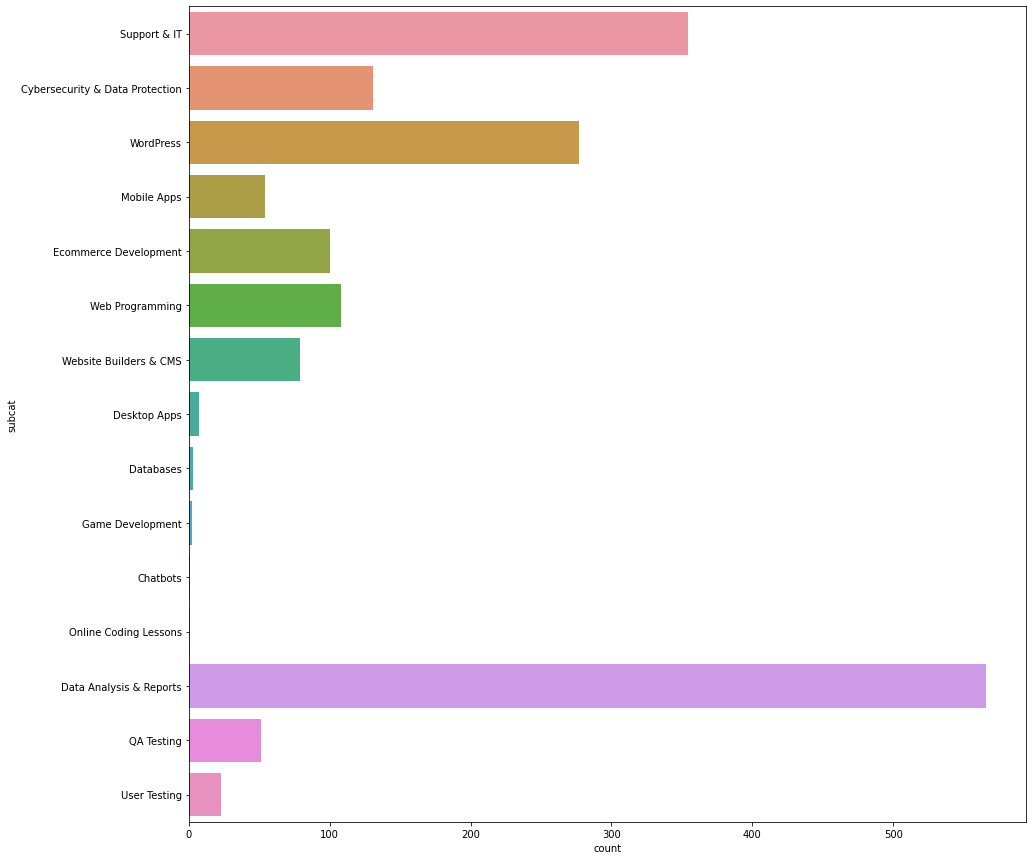

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y=upwork_clean['subcat'])
plt.show()

In [ ]:
plt.figure(figsize=(15,30))
sns.countplot(y=upwork_clean['price_advanced'])
plt.show()

In [ ]:
upwork_clean


,title,name,rating,price_starter,price_standard,price_advanced,category,subcat,joblink
1,You will get an efficient email migration to/f...,Varqa K.,4.8,"2,000","2,750","3,500",IT Support & Security,Support & IT,https://www.upwork.com/services/product/a-gsui...
5,You will get ASP.NET Core (C#) Part-time Support,LAKIR P.,5.0,375,660,"1,000",IT Support & Security,Support & IT,https://www.upwork.com/services/product/develo...
6,You will get end-to-end Remote Infrastructure ...,Indramani G.,5.0,30,45,65,IT Support & Security,Support & IT,https://www.upwork.com/services/product/end-to...
8,You will get dockerize your app and fix docker...,Muhammad U.,4.3,50,80,150,IT Support & Security,Support & IT,https://www.upwork.com/services/product/docker...
10,You will get Patch Configuration with Monitori...,Vishaldeep S.,4.3,400,600,800,IT Support & Security,Support & IT,https://www.upwork.com/services/product/patch-...
...,...,...,...,...,...,...,...,...,...
2792,You will get python web scraping and automatio...,Hammad R.,4.9,75,100,150,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/develo...
2793,"You will get Web Scraping, Data Extraction, Da...",Alpesh K.,5.0,100,200,300,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/develo...
2794,You will get your app or website tested!,Mário R.,5.0,30,40,70,Data Analysis & Testing,User Testing,https://www.upwork.com/services/product/develo...
2796,You will get a Statistical Review of a Grant o...,Michael B.,5.0,80,120,200,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/a-stat...


In [ ]:
upwork_clean.duplicated().sum()

0

### Popularity Based Recomender system

Export Dataset

In [ ]:
import pandas as pd


df = pd.DataFrame(upwork)

df.to_excel(r'upwork.xlsx', index=False)

With Review dataset



In [ ]:
upwork_clean_rev = pd.read_excel('/content/upwork_clean_review.xlsx')
upwork_clean_rev

In [ ]:
upwork_clean_rev['review'] = upwork_clean_rev['review'].str.replace('(', '')
upwork_clean_rev['review'] = upwork_clean_rev['review'].str.replace(')', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
upwork_clean_rev

,title,name,rating,Review,price_starter,price_standard,price_advanced,category,subcat,joblink
0,You will get an efficient email migration to/f...,Varqa K.,4.8,2840,"2,000","2,750","3,500",IT Support & Security,Support & IT,https://www.upwork.com/services/product/a-gsui...
1,You will get ASP.NET Core (C#) Part-time Support,LAKIR P.,5.0,1,375,660,"1,000",IT Support & Security,Support & IT,https://www.upwork.com/services/product/develo...
2,You will get end-to-end Remote Infrastructure ...,Indramani G.,5.0,721,30,45,65,IT Support & Security,Support & IT,https://www.upwork.com/services/product/end-to...
3,You will get dockerize your app and fix docker...,Muhammad U.,4.3,342,50,80,150,IT Support & Security,Support & IT,https://www.upwork.com/services/product/docker...
4,You will get Patch Configuration with Monitori...,Vishaldeep S.,4.3,295,400,600,800,IT Support & Security,Support & IT,https://www.upwork.com/services/product/patch-...
...,...,...,...,...,...,...,...,...,...,...
1752,You will get python web scraping and automatio...,Hammad R.,4.9,1207,75,100,150,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/develo...
1753,"You will get Web Scraping, Data Extraction, Da...",Alpesh K.,5.0,58,100,200,300,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/develo...
1754,You will get your app or website tested!,Mário R.,5.0,270,30,40,70,Data Analysis & Testing,User Testing,https://www.upwork.com/services/product/develo...
1755,You will get a Statistical Review of a Grant o...,Michael B.,5.0,521,80,120,200,Data Analysis & Testing,Data Analysis & Reports,https://www.upwork.com/services/product/a-stat...


In [ ]:
upwork_clean_rev.groupby('name').count()['review'].reset_index()

In [ ]:
upwork_clean_rev.drop('user_id', inplace=True, axis=1)

In [ ]:
upwork_clean_rev['rating'] = upwork_clean_rev['rating'].apply(float)
upwork_clean_rev['review'] = upwork_clean_rev['review'].apply(float)
upwork_clean_rev['price_starter'] = upwork_clean_rev['price_starter'].apply(float)
upwork_clean_rev['price_standard'] = upwork_clean_rev['price_standard'].apply(float)
upwork_clean_rev['price_advanced'] = upwork_clean_rev['price_advanced'].apply(float)

In [ ]:
popular_freelancer = upwork_clean_rev[upwork_clean_rev['review']>=300].sort_values('rating', ascending=False).head(10)

In [ ]:
popular_freelancer = popular_freelancer.drop_duplicates('title')[['title', 'name', 'rating', 'review', 'price_standard']]

In [ ]:
popular_freelancer

,title,name,rating,review,price_standard
1755,You will get a Statistical Review of a Grant o...,Michael B.,5.0,521.0,120
1306,You will get a visually appealing dashboard th...,Jesus V.,5.0,1207.0,150
830,You will get a mobile friendly squarespace web...,Minhazul A.,5.0,635.0,150
828,You will get your WordPress site the highest p...,Subir C.,5.0,339.0,200
1281,You will get an effective Python web scraper t...,Ahmed S.,5.0,365.0,150
1282,You will get a proper product with zero bugs,Charmi M.,5.0,1207.0,200
825,"You will get a great website with clean, fully...",Saira A.,5.0,365.0,500
1283,You will get a custom google data studio report,Naveen K.,5.0,448.0,130
1284,You will get daily tests on your Website/iOS/A...,Pedro P.,5.0,339.0,200
1289,You will get a Fantastic Macro to Automate You...,Maylson G.,5.0,689.0,250
